2.2.0


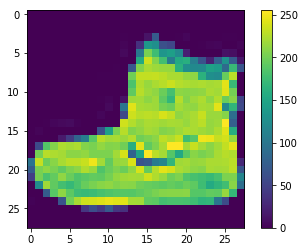

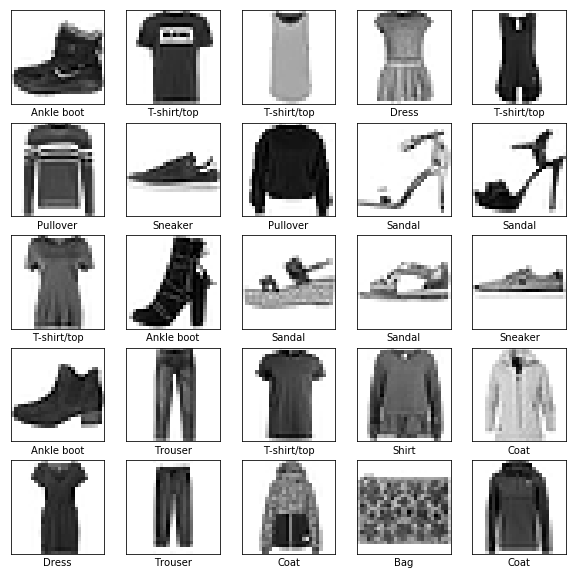

Epoch 1/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 1s 737us/step - loss: 0.3746 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.3364 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 1s 688us/step - loss: 0.3119 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 1s 680us/step - loss: 0.2928 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.2793 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.2660 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.2561 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 1s 700us/step - loss: 0.2472 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 1s 694u

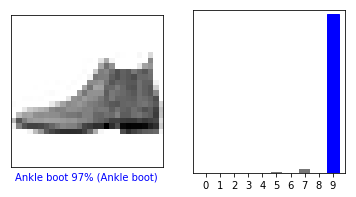

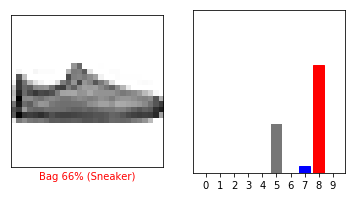

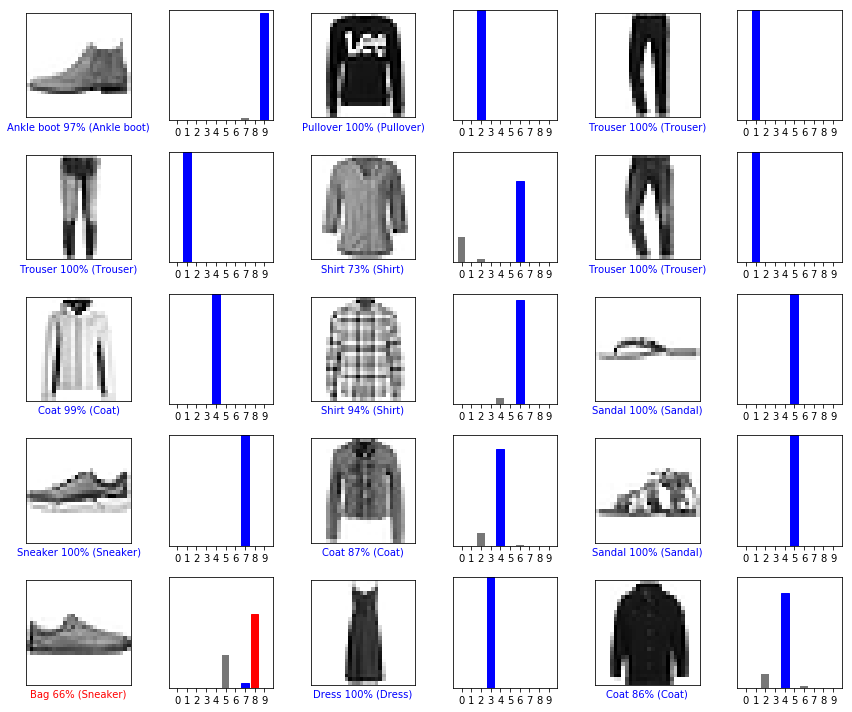

(28, 28)
(1, 28, 28)
[[2.5961686e-05 4.9109302e-12 9.9833506e-01 4.7398695e-12 1.5851503e-03
  5.8876278e-14 5.3856638e-05 3.4295156e-22 3.7221566e-11 4.9696971e-17]]


2

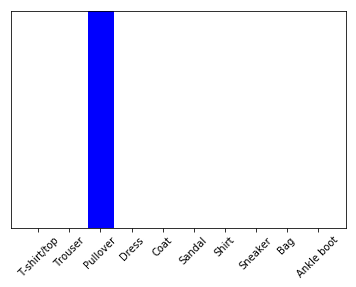

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

#Import fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Shows format of dataset
train_images.shape

#Number of labels
len(train_labels)

train_labels

#Shows format of test set
test_images.shape

#Number of labels
len(test_labels)

#Inspect first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Sets values to range 0-1
train_images = train_images / 255.0

test_images = test_images / 255.0

#Displays first 5 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Creates model with 3 layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Converts to 1d array
    keras.layers.Dense(128, activation='relu'), # fully connected layer
    keras.layers.Dense(10) # output layer
])

#Compiles model
model.compile(optimizer='adam', # Defines how the model is updated based on data & loss function
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Measures how acurate the model is durring training. goal is to minimize function
              metrics=['accuracy']) # Used to monitor training and testing, uses acuracym or fraction of correctly identified items

#Trains model
model.fit(train_images, train_labels, epochs=10)

# Evaluates accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

#Attaches softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

#Looks at first prediction
predictions[0]

#Shows label with highest confidence
np.argmax(predictions[0])

#Shows label of 1st item
test_labels[0]

#Graphs the full set of 10 prediction
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Verifies predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use model to make prediction about a single image
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

# Predicts label
predictions_single = probability_model.predict(img)

print(predictions_single)

#Plots prediction
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


# Shows prediction
np.argmax(predictions_single[0])
